In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
df_h_atk = pd.read_csv("heart_attack_city.csv")
df_avg_elevation = pd.read_csv("avg_elevation.csv")
df_h_atk_elev = pd.read_csv("heart_attack_city.csv")
df_h_atk

,City,State,Percent with Heart Attack,High Blood Pressure,High Cholesterol,Diabetes,Depression,Obesity,Elevation
0,Anchorage,AK,4.3,25.1,16.9,7.7,13.2,26.7,102
1,Huntsville,AL,3.2,32.6,26.6,13.5,12.8,28.2,600
2,Montgomery,AL,3.9,31.4,21.9,12.6,12.7,31.1,240
3,Daphne,AL,4.7,30.1,25.3,13.5,15.1,26.5,157
4,Fairhope,AL,4.7,30.1,25.3,13.5,15.1,26.5,122
5,Foley,AL,4.7,30.1,25.3,13.5,15.1,26.5,79
6,Mobile,AL,4.8,35.3,30.7,17.7,16.2,35.7,10
7,Birmingham,AL,5.5,36.2,28.4,13.8,20.1,30.3,643
8,Hoover,AL,5.5,36.2,28.4,13.8,20.1,30.3,577
9,Fayetteville,AR,3.2,29.2,22.4,11.2,18.2,28.5,1401


In [3]:
len(df_h_atk["State"].unique())

47

In [4]:
def parse_state_code(state_str):
    return state_str[state_str.index("-") + 1:].strip()

In [5]:
df_avg_elevation["State"] = df_avg_elevation["State"].apply(parse_state_code)
df_avg_elevation

,State,Highest point,Highest elevation,Lowest point,Lowest elevation,Mean elevation,Elevation difference
0,AL,Cheaha Mountain,"2,413 feet (735 m)[5]",Gulf of Mexico,0 feet (0 m),500 feet (152 m),"2,413 feet (735 m)"
1,AK,Mount McKinley,"20,320 feet (6,194 m)",Pacific Ocean,0 feet (0 m),"1,900 feet (579 m)","20,320 feet (6,194 m)"
2,AZ,Humphreys Peak,"12,637 feet (3,852 m)[6]",Colorado River,70 feet (21 m),"4,100 feet (1,250 m)","12,567 feet (3,830 m)"
3,AR,Mount Magazine,"2,753 feet (839 m)",Ouachita River,55 feet (17 m),650 feet (198 m),"2,698 feet (822 m)"
4,CA,Mount Whitney,"14,505 feet (4,421 m)[7]",Death Valley,-282 feet (-86 m),"2,900 feet (884 m)","14,776 feet (4,504 m)"
5,CO,Mount Elbert,"14,440 feet (4,401 m)[8]",Arikaree River[9],"3,315 feet (1,010 m)","6,800 feet (2,073 m)","11,125 feet (3,391 m)"
6,CT,Mount Frissell,"2,380 feet (725 m)",Long Island Sound,0 feet (0 m),500 feet (152 m),"2,380 feet (725 m)"
7,DE,Ebright Azimuth,448 feet (137 m),Atlantic Ocean,0 feet (0 m),60 feet (18 m),448 feet (137 m)
8,FL,Britton Hill,345 feet (105 m),Atlantic Ocean,0 feet (0 m),100 feet (30 m),345 feet (105 m)
9,GA,Brasstown Bald,"4,784 feet (1,458 m)",Atlantic Ocean,0 feet (0 m),600 feet (183 m),"4,784 feet (1,458 m)"


In [6]:
elev_by_state = defaultdict(int)
for index, row in df_avg_elevation.iterrows():
    state_code = row["State"]
    elev = row["Mean elevation"]
    elev_num = int(elev[:elev.index("feet")].replace(",",""))
    elev_by_state[state_code] = elev_num


In [7]:
avg_by_state = defaultdict(list)
for index, row in df_h_atk.iterrows():
    state_code = row["State"]
    avg_by_state[state_code].append(row["Percent with Heart Attack"])


for key in avg_by_state.keys():
    num_avgs = len(avg_by_state[key])
    sum_avgs = sum(avg_by_state[key])
    avg_by_state[key] = [sum_avgs / num_avgs]

    

In [8]:
for state_code, elev in elev_by_state.iteritems():
    avg_by_state[state_code].append(elev)

keys_to_delete = []
for k in avg_by_state:
    if len(avg_by_state[k]) < 2:
        keys_to_delete.append(k)

for key in keys_to_delete:
    del avg_by_state[key]
    
percentage_lst = []
elev_lst = []
data = []
for k in avg_by_state:
    for_state = avg_by_state[k]
    data.append((for_state[0], for_state[1]))

In [9]:
df = pd.DataFrame(data, columns=["Percentage with Heart Attack", "Elevation in ft."])
df

,Percentage with Heart Attack,Elevation in ft.
0,3.627273,1700
1,4.000000,60
2,3.000000,1050
3,8.250000,1500
4,3.600000,3030
5,5.113889,100
6,3.266667,1000
7,3.066667,250
8,3.400000,5700
9,3.284211,1700


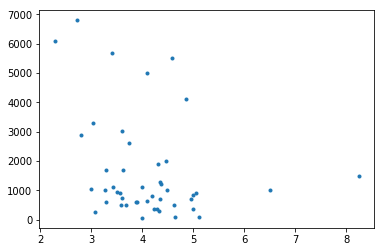

In [10]:
f, ax = plt.subplots()
ax.plot(df['Percentage with Heart Attack'], df['Elevation in ft.'], '.')
plt.gcf()

In [11]:
df_h_atk_elev

,City,State,Percent with Heart Attack,High Blood Pressure,High Cholesterol,Diabetes,Depression,Obesity,Elevation
0,Anchorage,AK,4.3,25.1,16.9,7.7,13.2,26.7,102
1,Huntsville,AL,3.2,32.6,26.6,13.5,12.8,28.2,600
2,Montgomery,AL,3.9,31.4,21.9,12.6,12.7,31.1,240
3,Daphne,AL,4.7,30.1,25.3,13.5,15.1,26.5,157
4,Fairhope,AL,4.7,30.1,25.3,13.5,15.1,26.5,122
5,Foley,AL,4.7,30.1,25.3,13.5,15.1,26.5,79
6,Mobile,AL,4.8,35.3,30.7,17.7,16.2,35.7,10
7,Birmingham,AL,5.5,36.2,28.4,13.8,20.1,30.3,643
8,Hoover,AL,5.5,36.2,28.4,13.8,20.1,30.3,577
9,Fayetteville,AR,3.2,29.2,22.4,11.2,18.2,28.5,1401


In [12]:
def standardize_elevation(elev_str):
    return elev_str.replace("'", "").replace(",", "")

df_h_atk_elev = df_h_atk_elev.dropna()
df_h_atk_elev['Elevation'] = df_h_atk_elev['Elevation'].apply(standardize_elevation)
df_h_atk_elev

,City,State,Percent with Heart Attack,High Blood Pressure,High Cholesterol,Diabetes,Depression,Obesity,Elevation
0,Anchorage,AK,4.3,25.1,16.9,7.7,13.2,26.7,102
1,Huntsville,AL,3.2,32.6,26.6,13.5,12.8,28.2,600
2,Montgomery,AL,3.9,31.4,21.9,12.6,12.7,31.1,240
3,Daphne,AL,4.7,30.1,25.3,13.5,15.1,26.5,157
4,Fairhope,AL,4.7,30.1,25.3,13.5,15.1,26.5,122
5,Foley,AL,4.7,30.1,25.3,13.5,15.1,26.5,79
6,Mobile,AL,4.8,35.3,30.7,17.7,16.2,35.7,10
7,Birmingham,AL,5.5,36.2,28.4,13.8,20.1,30.3,643
8,Hoover,AL,5.5,36.2,28.4,13.8,20.1,30.3,577
9,Fayetteville,AR,3.2,29.2,22.4,11.2,18.2,28.5,1401


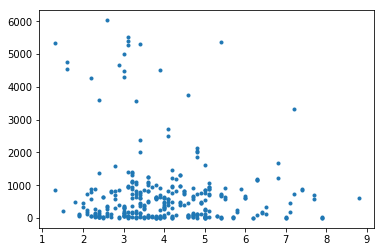

In [13]:
f, ax = plt.subplots()
ax.plot(df_h_atk_elev['Percent with Heart Attack'], df_h_atk_elev['Elevation'], '.')
plt.gcf()